# Pet Classification using CNN

#####Mounting the drive

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#####Importing libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2

###Designing CNN

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, 5, 5, input_shape = (512, 512, 3), activation = 'relu',kernel_regularizer=l2(l2=0.001)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))
classifier.add(Conv2D(64, 5, 5, activation = 'relu',kernel_regularizer=l2(l2=0.001)))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))
classifier.add(Flatten())

#####Full connection/ANN part

In [ ]:
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 102, 102, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 51, 51, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 51, 51, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', Precision(), Recall()])

#####Data Augmentation

In [ ]:

# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Pet_Classification/data/train',
                                                 target_size = (512, 512),
                                                 batch_size = 8,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Pet_Classification/data/test',
                                            target_size = (512, 512),
                                            batch_size = 8,
                                            class_mode = 'binary')


Found 20 images belonging to 2 classes.


In [ ]:
! pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKerasTF

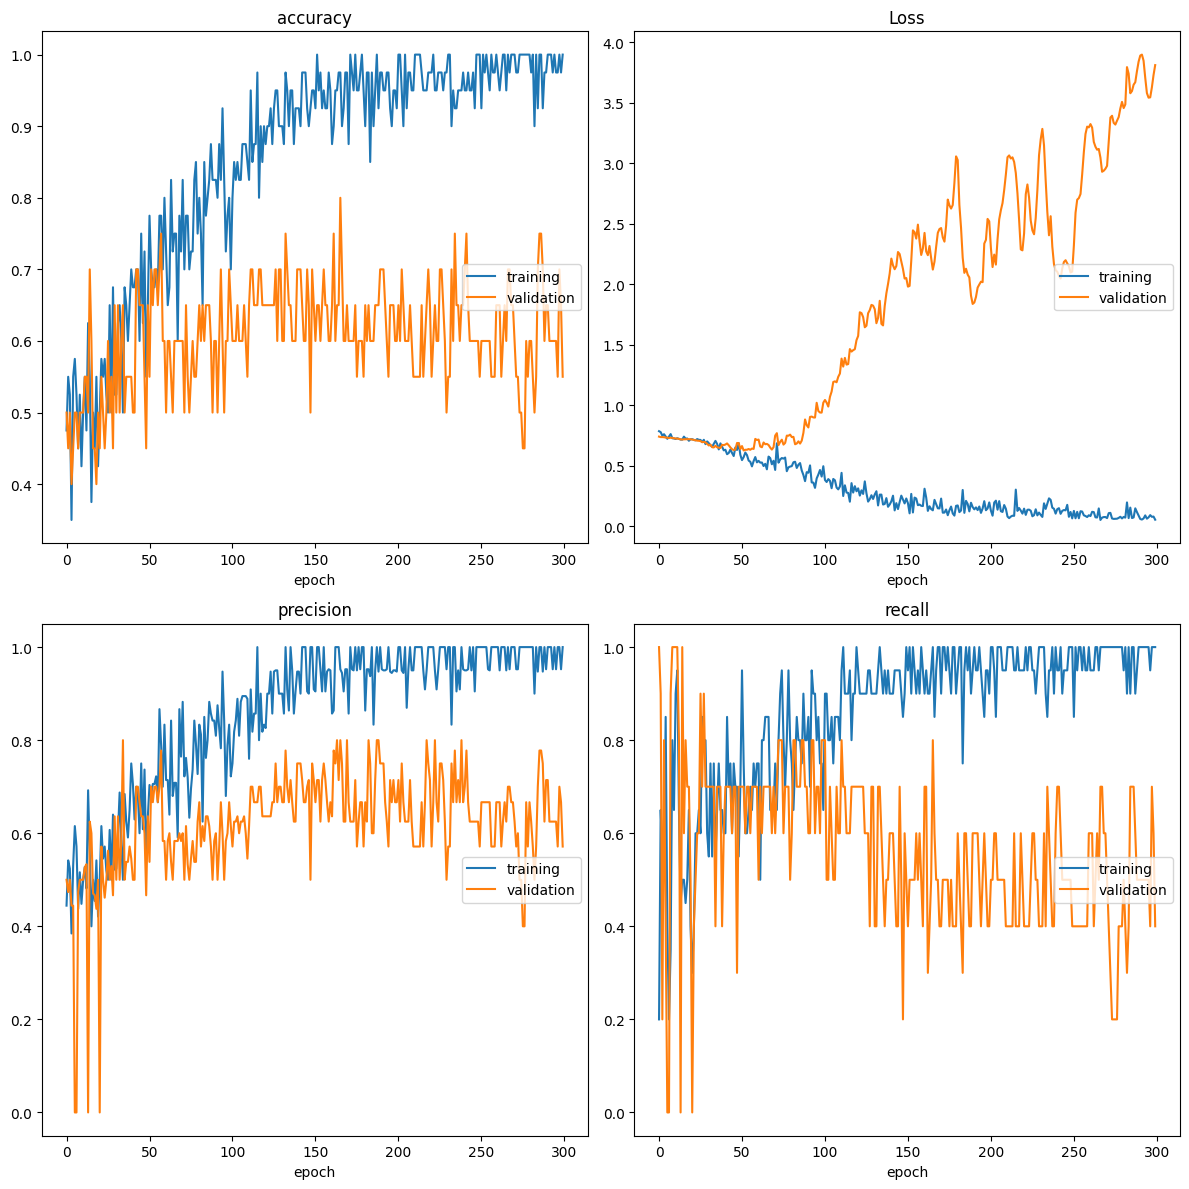

accuracy
	training         	 (min:    0.350, max:    1.000, cur:    1.000)
	validation       	 (min:    0.400, max:    0.800, cur:    0.550)
Loss
	training         	 (min:    0.054, max:    0.787, cur:    0.056)
	validation       	 (min:    0.628, max:    3.898, cur:    3.812)
precision
	training         	 (min:    0.385, max:    1.000, cur:    1.000)
	validation       	 (min:    0.000, max:    0.800, cur:    0.571)
recall
	training         	 (min:    0.200, max:    1.000, cur:    1.000)
	validation       	 (min:    0.000, max:    1.000, cur:    0.400)
5/5 [==============================] - 4s 786ms/step - loss: 0.0556 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.8118 - val_accuracy: 0.5500 - val_precision: 0.5714 - val_recall: 0.4000


In [ ]:
classifier.fit(training_set,epochs=300,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/Pet_Classification/data/test/dogs/107.jpg',target_size=(512,512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]<=0.5:
    prediction= 'cat'
    print('Result is',result[0][0])
else:
    prediction = 'dog'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 23ms/step
Result is 1.0
dog


In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/Pet_Classification/data/test/cats/104.jpg',target_size=(512,512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]<=0.5:
    prediction= 'cat'
    print('Result is',result[0][0])
else:
    prediction = 'dog'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 49ms/step
Result is 0.0
cat


In [ ]:
classifier.save('Classification.h5')

In [ ]:
from keras.models import load_model
loaded_model = load_model("Classification.h5")

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/Pet_Classification/data/test/cats/108.jpg',target_size=(512,512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = loaded_model.predict(test_image)
training_set.class_indices

if result[0][0]<=0.5:
    prediction= 'cat'
    print('Result is',result[0][0])
else:
    prediction = 'dog'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 87ms/step
Result is 0.0
cat


In [ ]:
from keras.models import model_from_json
model_json = classifier.to_json()
with open("Classification.json", "w") as json_file:
  json_file.write(model_json)

classifier.save_weights("Classification.h5")

json_file = open("Classification.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("Classification.h5")

In [ ]:
from google.colab import files
files.download('Classification.h5')
files.download('Classification.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
classifier.save('Classification.h5')

destination_path = '/content/gdrive/MyDrive/Pet_Classification/Classification.h5'

shutil.copyfile('Classification.h5', destination_path)

In [51]:
from keras.models import load_model

destination_path = '/content/gdrive/MyDrive/Pet_Classification/Classification.h5'

loaded_model = load_model(destination_path)

1/1 [==============================] - 0s 77ms/step
Result is 1.0
dog


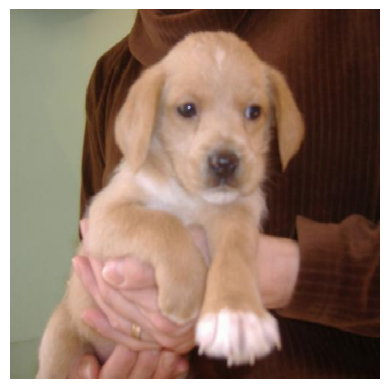

In [52]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import io

img = image.load_img('/content/gdrive/MyDrive/Pet_Classification/data/test/dogs/103.jpg',target_size=(512,512))
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image,axis=0)
result = loaded_model.predict(test_image)

if result[0][0]<=0.5:
    prediction= 'cat'
    print('Result is',result[0][0])
else:
    prediction = 'dog'
    print('Result is',result[0][0])

print(prediction)


plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 29ms/step
Result is 0.0
cat


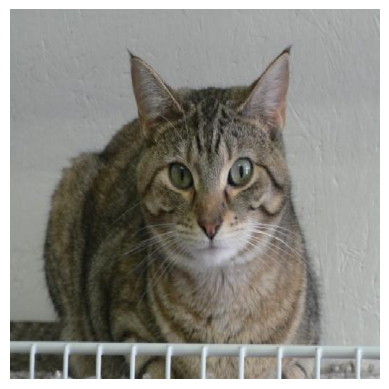

In [53]:
img = image.load_img('/content/gdrive/MyDrive/Pet_Classification/data/test/cats/103.jpg',target_size=(512,512))
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image,axis=0)
result = loaded_model.predict(test_image)

if result[0][0]<=0.5:
    prediction= 'cat'
    print('Result is',result[0][0])
else:
    prediction = 'dog'
    print('Result is',result[0][0])

print(prediction)


plt.imshow(img)
plt.axis('off')
plt.show()